In [1]:
from pyo import *
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
#input_names, input_indexes  = pa_get_input_devices()
#output_names, output_indexes = pa_get_output_devices()
#pa_list_devices()

In [3]:
s = Server(sr = 48000,duplex=0)
# nchnls=8: number of channels to be created
s.boot()

In [4]:
s.start()
s.amp=0.9

# Beat creator

In [ ]:
# Configuring beat(s)

# Square waveform generator.
# Generates square waveforms made up of fixed number of harmonics.
wsv = SquareTable()

# Generates isochronous trigger signals.
#time=1; poly=1
time=0.5; poly=2
beat = Metro(time=time,poly=poly).play()
beat2 = Metro(time=time/4,poly=poly).play()
beat3 = Metro(time=time*2,poly=poly).play()

# Amplitude envelope shape
# Construct a table from cosine interpolated segments.
envelope = CosTable([(0,0),(500,1),(800,.2),(8191,0)])
envelope2 = CosTable([(0,0),(100,1),(500,.1),(8191,0)])
envelope3 = CosTable([(0,0),(100,1),(4000,.1),(8191,0)])

# TrigEnv(input, table, dur=1, interp=2, mul=1, add=0)
# TrigEnv starts reading an envelope in dur seconds each time it receives a trigger in its input parameter.
#dur = .25; mul = 0.7
dur = 0.5; mul = 1.0
amplitude = TrigEnv(beat,table=envelope,dur=dur,mul=mul)
amplitude2 = TrigEnv(beat2,table=envelope2,dur=dur/2,mul=mul/6)
amplitude3 = TrigEnv(beat3,table=envelope3,dur=dur,mul=mul/10)

# random notes
# TrigXnoiseMidi(input, dist=0, x1=0.5, x2=0.5, scale=0, mrange=(0, 127), mul=1, add=0)
# Xnoise implements a few of the most common noise distributions. 
# A new value is generated each time the object receive a trigger in input. 
# Each distribution generates integer values in the range defined with mrange parameter and 
# output can be scaled on midi notes, hertz or transposition factor.
pitch = TrigXnoiseMidi(beat,dist=1,scale=0,mrange=(20,21))
pitch2 = TrigXnoiseMidi(beat2,dist=1,scale=0,mrange=(50,58))
pitch3 = TrigXnoiseMidi(beat3,dist=1,scale=0,mrange=(80,85))

In [ ]:
# Oscillator
oscillator = Osc(table=wsv,freq=pitch,mul=amplitude).out()
#time.sleep(2)

In [ ]:
oscillator2 = Osc(table=wsv,freq=pitch2,mul=amplitude2).out()

In [ ]:
oscillator3 = Osc(table=wsv,freq=pitch3,mul=amplitude3).out()

In [ ]:
oscillator.stop()
oscillator2.stop()
oscillator3.stop()

In [ ]:
plt.plot(list(envelope.getTable()))
plt.plot(list(envelope2.getTable()))
plt.plot(list(envelope3.getTable()))

In [ ]:
# Piano
# synth signal shape
sig = SawTable(order=12).normalize()
#sig = ListTable([(0,20), (200,5), (1000,2), (8191,1)])

# tempo
metro_synth = Metro(time=0.125, poly=2).play()

# LFO filter
lfo = LFO(freq=2.2, sharp=0.2, type=4, mul=110, add=220)

# synth envelope
envelope_synth = TrigEnv(metro_synth, table=sig, dur=0.5)

# triggering a synth
synth = FM(carrier=[220.5,220], ratio=[.2498, .2503], index=envelope_synth, mul=0.2).out()

In [ ]:
synth2 = FM(carrier=lfo, ratio=[.2498, .2503], index=envelope_synth, mul=0.3).out()

In [ ]:
synth.stop()

In [ ]:
synth2.stop()

In [ ]:
# 80s
lfd = Sine([.4,.2], mul=.2, add=.5)
#synth_80 = SuperSaw(freq=440, detune=lfd, bal=0.5, mul=0.2).out()
synth_80.stop()

# Basic examples

#### Sine-tone

In [ ]:
freq = 440 # Hz
a = Sine(freq=freq, mul=0.1)
b = Sine(freq=freq*1/12, mul=0.05)
a.out()
b.out()

In [ ]:
a.stop()
b.stop()
# never forget to stop the sounds

#### Multiple processes on a single source.

In [ ]:
# Creates a sine wave as the source to process.
# Inputs:
# freq: Frequency in cycles per second. Defaults to 1000.
# phase: Phase of sampling, expressed as a fraction of a cycle (0 to 1). Defaults to 0.
# The `mul` attribute multiplies each sample by its value.
# The `add` attribute adds an offset to each sample.
s.amp = 0.1
a = Sine()

In [ ]:
# Passes the sine wave through an harmonizer.
# Harmonizer: Generates harmonizing voices in synchrony with its audio input.
hr = Harmonizer(a).out()

In [ ]:
# Also through a chorus.
# A chorus effect occurs when individual sounds with roughly the same timbre 
# and nearly (but never exactly) the same pitch converge and are perceived as one.
ch = Chorus(a).out()

In [ ]:
# And through a frequency shifter.
sh = FreqShift(a).out()

In [ ]:
a.stop()

#### Chaining processes on a single source.

In [ ]:
s.amp = 0.1
# Creates a sine wave as the source to process.
a = Sine().out(0)

In [ ]:
# Passes the sine wave through an harmonizer.
h1 = Harmonizer(a).out()
# Then the harmonized sound through another harmonizer.
h2 = Harmonizer(h1).out()
# And again...
#h3 = Harmonizer(h2).out()
# And again...
#h4 = Harmonizer(h3).out()

In [ ]:
a.stop()

#### Output channels

In [ ]:
s.amp = 0.1

# Creates a source (white noise)
n = Noise()

In [ ]:
# Sends the bass frequencies (below 1000 Hz) to the left
#ButLP: A second-order Butterworth lowpass filter. ButLP implements a second-order 
# IIR Butterworth lowpass filter, which has a maximally flat passband and a very good 
# precision and stopband attenuation.
lp = ButLP(n).out()

In [ ]:
# Sends the high frequencies (above 1000 Hz) to the right
hp = ButHP(n).out(1)

In [ ]:
n.stop()

#### Multiple sines

In [ ]:
# Sets fundamental frequency
freq = 200

s.amp = 0.1

# Approximates a triangle waveform by adding odd harmonics with
# amplitude proportional to the inverse square of the harmonic number.
h1 = Sine(freq=freq, mul=1).out()
h2 = Sine(freq=freq * 3, phase=0.5, mul=1.0 / pow(3, 2)).out()
h3 = Sine(freq=freq * 5, mul=1.0 / pow(5, 2)).out()
h4 = Sine(freq=freq * 7, phase=0.5, mul=1.0 / pow(7, 2)).out()
h5 = Sine(freq=freq * 9, mul=1.0 / pow(9, 2)).out()
h6 = Sine(freq=freq * 11, phase=0.5, mul=1.0 / pow(11, 2)).out()

# Displays the final waveform
sp = Scope(h1 + h2 + h3 + h4 + h5 + h6)

#s.gui(locals())

In [ ]:
h1.stop()
h2.stop()
h3.stop()
h4.stop()
h5.stop()
h6.stop()

#### 02-04 Audio control of parameters.

In [ ]:
# Creates a noise source
n = Noise()

In [ ]:
# Creates an LFO oscillating +/- 500 around 1000 (filter's frequency)
lfo1 = Sine(freq=0.1, mul=5000, add=1000)
# Creates an LFO oscillating between 2 and 8 (filter's Q)
lfo2 = Sine(freq=0.4).range(2, 8)
# Creates a dynamic bandpass filter applied to the noise source
bp1 = ButBP(n, freq=lfo1, q=lfo2).out()

In [ ]:
# The LFO object provides more waveforms than just a sine wave

# Creates a ramp oscillating +/- 1000 around 12000 (filter's frequency)
#lfo3 = LFO(freq=0.25, type=1, mul=1000, add=1200)
lfo3 = LFO(freq=0.1, type=1, mul=100000, add=1200)
# Creates a square oscillating between 4 and 12 (filter's Q)
lfo4 = LFO(freq=4, type=2).range(4, 12)
# Creates a second dynamic bandpass filter applied to the noise source
bp2 = ButBP(n, freq=lfo3, q=lfo4).out(1)

In [ ]:
bp1.stop()

In [ ]:
bp2.stop()

#### 02-06 and 02-07 Multichannel expansion (streams)

In [ ]:
### Using multichannel-expansion to create a square wave ###

# Sets fundamental frequency.
freq = 100
# Sets the highest harmonic.
high = 20

# Generates the list of harmonic frequencies (odd only).
harms = [freq * i for i in range(1, high) if i % 2 == 1]
# Generates the list of harmonic amplitudes (1 / n).
amps = [0.33 / i for i in range(1, high) if i % 2 == 1]

# Creates all sine waves at once.
a = Sine(freq=harms, mul=amps)
# Prints the number of streams managed by "a".
print(len(a))

# The mix(voices) method (defined in PyoObject) mixes
# the object streams into `voices` streams.
b = a.mix(voices=1).out()

In [ ]:
b.stop()

In [ ]:
# 12 streams with different combinations of `freq` and `ratio`.
a = SumOsc(
    freq=[100, 150.2, 200.5, 250.7],
    ratio=[0.501, 0.753, 1.255],
    index=[0.3, 0.4, 0.5, 0.6, 0.7, 0.4, 0.5, 0.3, 0.6, 0.7, 0.3, 0.5],
    mul=0.05,
)
# Freeverb is a reverb unit generator based on Jezar’s public domain C++ sources, 
# composed of eight parallel comb filters, followed by four allpass units in series. 
# Filters on each stream are slightly detuned in order to create multi-channel effects.
rev = Freeverb(a.mix(2), size=0.80, damp=0.70, bal=0.30).out()


In [ ]:
a.stop()
rev.stop()

In [ ]:
s.stop()

In [ ]:
s.shutdown()

# More Advanced Examples

#### Now let's write our first 4 voices composition!

In [ ]:
pitches = [midiToHz(m) for m in [36,43,48,55,60,62,64,65,67,69,71,72]]

# Add more voices here to generate a simple counterpoint
choice = Choice(choice=pitches, freq=2)
ch_port = Port(choice, risetime=.001, falltime=.001)

# Two simple instruments
lfdetune = Sine(freq=0.1, mul=.07, add=.07)
instrument1 = SuperSaw(freq=ch_port, detune=lfdetune, mul=.1)
lfind = Sine(freq=0.1, phase=0.5, mul=3, add=3)
instrument2 = FM(carrier=ch_port, ratio=1.0025, index=lfind, mul=.025)

# Send instruments output to delay
src_sum = instrument1.mix(2) + instrument2.mix(2)
lfdel = Sine(.1, mul=.003, add=.005)
comb = Delay(src_sum, delay=lfdel, feedback=.5)

# Send two resulting signals to reverb and output
out_sum = src_sum + comb
rev = STRev(out_sum, cutoff=3500, bal=.5, roomSize=2, mul=0.5).out()

In [ ]:
rev.stop()

#### Playing with triggers and performing our first canon :)

In [ ]:
# Builds an amplitude envelope in a linear table
env = LinTable([(0,0), (190,.8), (1000,.5), (4300,.1), (8191,0)], size=8192)
env.graph()

# Metronome provided by Beat
met = Beat(time=.125, taps=16, w1=90, w2=50, w3=30).play()

# Reads the amp envelope for each trigger from Beat
amp = TrigEnv(met, table=env, dur=met['dur'], mul=met['amp'])

# Generates a midi note for each trigger from Beat in a pseudo-random distribution
fr = TrigXnoiseMidi(met, dist=12, x1=1, x2=.3, scale=0, mrange=(48,85))

# Receives the midi note from XnoiseMidi and scale it into C harmonic minor (try others!)
frsnap = Snap(fr, choice=[0,2,3,5,7,8,11], scale=1)

# This instrument receives a frequency from Snap and molde it inside an envelop from TrigEnv
lfo = Sine(freq=.05, mul=.05, add=.08)
gen = SineLoop(freq=frsnap, feedback=lfo, mul=amp*.5).out(0)

# Output the same signal with some delay in the right speaker (try a 'real' counterpoint!)
rev = Delay(gen, delay=[.25, .5], feedback=.3, mul=.8).out(1)

In [ ]:
rev.stop()

In [ ]:
gen.stop()

#### MIDI out

In [ ]:
s = Server(audio='jack')
s.setMidiOutputDevice(3)
s.boot()

In [ ]:
def playsoprano():
    s.sendMidiNote(choice([60, 62, 63, 65, 67, 68, 71]), randint(30,100), channel=1)

def playtenor():
    s.sendMidiNote(choice([48, 50, 51, 53, 55, 56, 59]), randint(50,60), channel=2)

def playbass():
    s.sendMidiNote(choice([36, 36, 36, 41, 48]), randint(80,100), channel=3)

met = Beat(time=.5, taps=16, w1=80, w2=60, w3=40).play()
p = TrigFunc(met, playsoprano).play()

met2 = Beat(time=1, taps=16, w1=70, w2=50, w3=30).play()
p2 = TrigFunc(met2, playtenor).play()

met3 = Beat(time=1, taps=16, w1=100, w2=20, w3=10).play()
p3 = TrigFunc(met3, playbass).play()

In [ ]:
s.stop()

In [ ]:
s.shutdown()

# Koh Samui

In [68]:
# deep base 1
wsv = SquareTable()
time=0.5; poly=2
beat = Metro(time=time,poly=poly).play()
envelope = CosTable([(0,0),(500,1),(800,.2),(8191,0)])
dur = 0.5; mul = 1.0
amplitude = TrigEnv(beat,table=envelope,dur=dur,mul=mul)
pitch = TrigXnoiseMidi(beat,dist=1,scale=0,mrange=(20,21))
oscillator = Osc(table=wsv,freq=pitch,mul=amplitude).out()

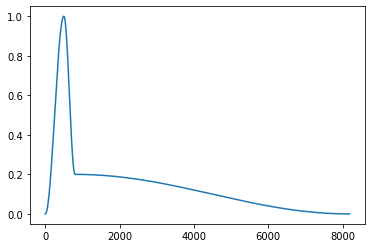

In [69]:
plt.plot(list(envelope.getTable()))

In [70]:
oscillator.stop()

< Instance of Osc class >

In [71]:
# high pitch 1
wsv2 = SquareTable()
time2=0.5; poly2=2 # trigger every time
beat2 = Metro(time=time2,poly=poly2).play()
envelope2 = CosTable([(0,0),(2000,.05),(2100,1),(2800,.05),(8191,0)])
dur2 = 0.5; mul2 = 0.1 # envelope duration 0.1
amplitude2 = TrigEnv(beat2,table=envelope2,dur=dur2,mul=mul2)
pitch2 = TrigXnoiseMidi(beat2,dist=1,scale=0,mrange=(200,201))
oscillator2 = Osc(table=wsv2,freq=pitch2,mul=amplitude2).out()

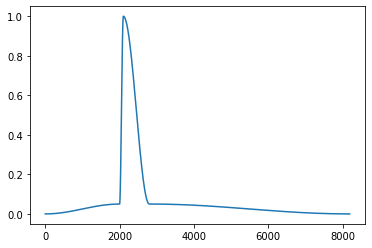

In [72]:
plt.plot(list(envelope2.getTable()))

In [73]:
oscillator2.stop()

< Instance of Osc class >

In [82]:
oscillator = Osc(table=wsv,freq=pitch,mul=amplitude).out()
#tm.sleep(0.25)
oscillator2 = Osc(table=wsv2,freq=pitch2,mul=amplitude2).out()

In [83]:
oscillator.stop()
oscillator2.stop()

< Instance of Osc class >

In [6]:
t = CosTable([(0,0), (100,1), (500,.3), (8191,0)])
beat = Beat(time=.125, taps=16, w1=[90,80], w2=50, w3=35, poly=1).play()
trmid = TrigXnoiseMidi(beat, dist=12, mrange=(60, 96))
trhz = Snap(trmid, choice=[0,2,3,5,7,8,10], scale=1)
tr2 = TrigEnv(beat, table=t, dur=beat['dur'], mul=beat['amp'])
a = Sine(freq=trhz, mul=tr2*0.3).out()

In [7]:
a.stop()

< Instance of Sine class >